In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the raw data
data_path = r"D:\College\Semster_8\IoT2\Task_2\tinyml-weather-classification\data\weather_data_raw.csv"
df = pd.read_csv(data_path, encoding='cp1252')

# Display basic info
print("Original data shape:", df.shape)
print(df.info())
print(df.head())



Original data shape: (4998, 2)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4998 entries, 0 to 4997
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Temperature (C)  4998 non-null   float64
 1   Humidity         4998 non-null   float64
dtypes: float64(2)
memory usage: 78.2 KB
None
   Temperature (C)  Humidity
0        18.877778      0.47
1        18.911111      0.46
2        19.005556      0.46
3        20.044444      0.40
4        21.050000      0.40


In [45]:
# Let's define:
# - "Cold" as temperature <= 17°C
# - "Sunny" as temperature > 18°C and humidity < 0.7

df['weather'] = np.where(
    (df['Temperature (C)'] > 18) & (df['Humidity'] < 0.7),
    'Sunny',
    np.where(
        df['Temperature (C)'] <= 17,
        'Cold',None
    )
)

In [46]:
df = df.dropna(subset=['weather'])

# Select only the columns we need
processed_df = df[['Temperature (C)', 'Humidity', 'weather']].rename(columns={
    'Temperature (C)': 'temperature',
    'Humidity': 'humidity'
})




Class distribution after processing:
weather
Sunny    2499
Cold     2499
Name: count, dtype: int64


d:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\Anaconda\Lib\site-package

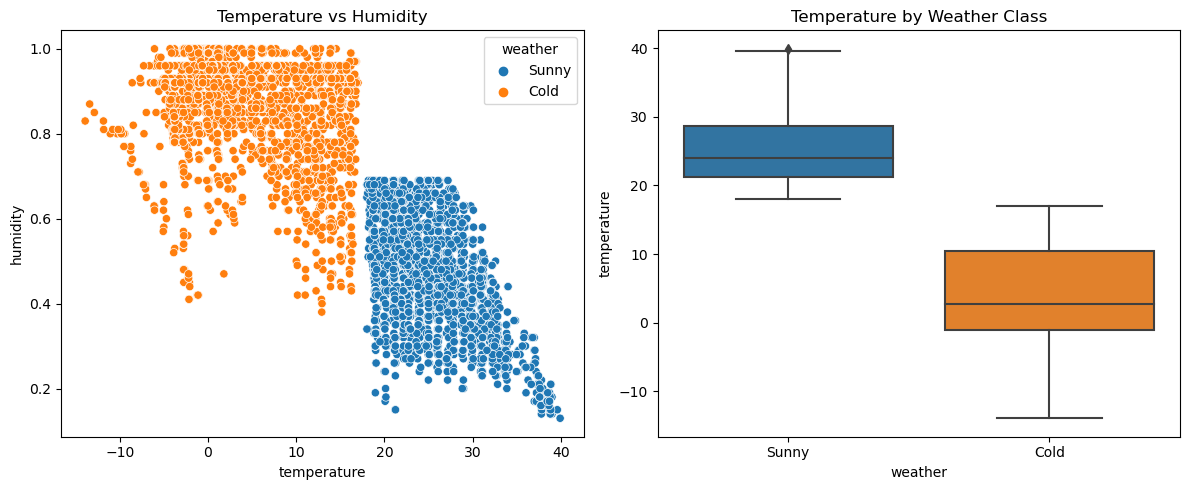

In [47]:
# Check class distribution
print("\nClass distribution after processing:")
print(processed_df['weather'].value_counts())

# Visualize the selected features
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.scatterplot(data=processed_df, x='temperature', y='humidity', hue='weather')
plt.title('Temperature vs Humidity')

plt.subplot(1, 2, 2)
sns.boxplot(data=processed_df, x='weather', y='temperature')
plt.title('Temperature by Weather Class')
plt.tight_layout()
plt.show()



d:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


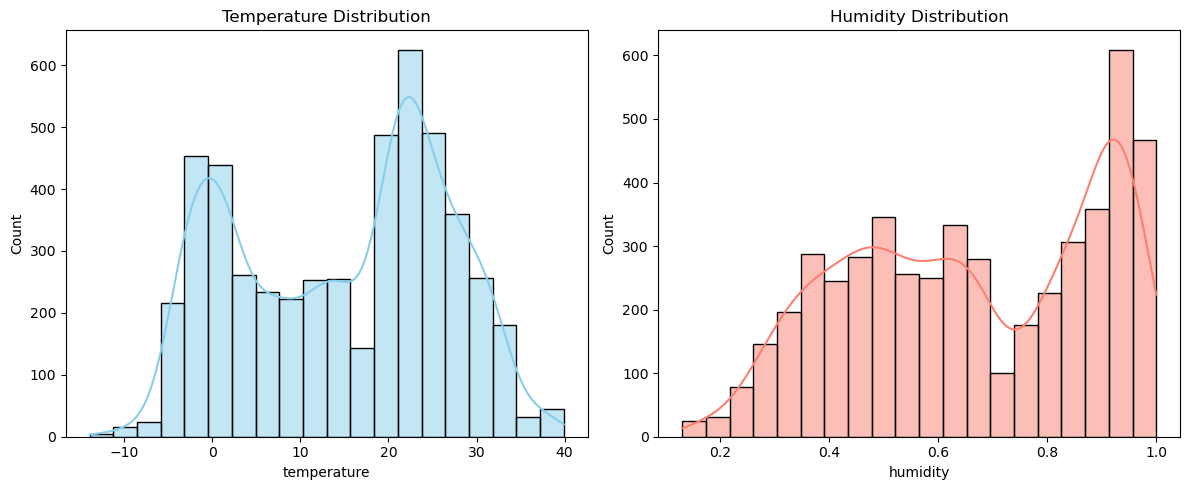

In [48]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(processed_df['temperature'], bins=20, kde=True, color='skyblue')
plt.title('Temperature Distribution')

plt.subplot(1, 2, 2)
sns.histplot(processed_df['humidity'], bins=20, kde=True, color='salmon')
plt.title('Humidity Distribution')

plt.tight_layout()
plt.show()

d:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


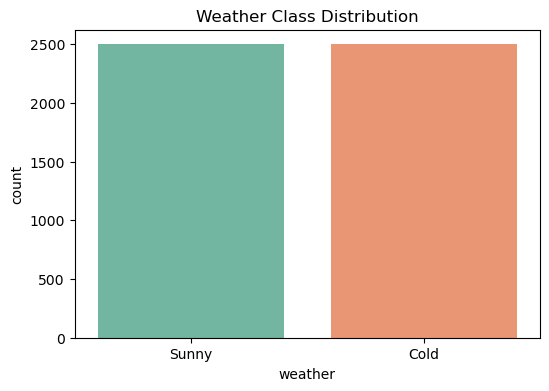

In [49]:
plt.figure(figsize=(6, 4))
sns.countplot(x='weather', data=processed_df, palette='Set2')
plt.title('Weather Class Distribution')
plt.show()


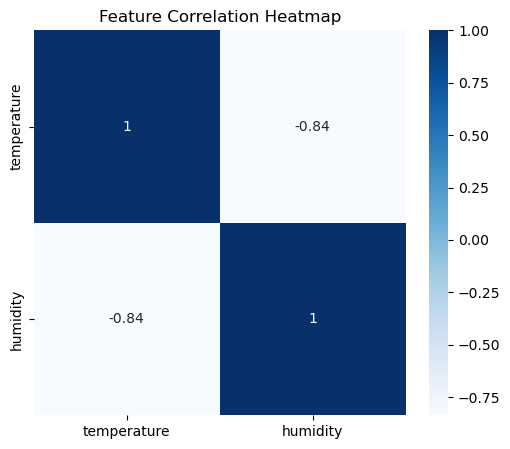

In [50]:
plt.figure(figsize=(6, 5))
corr = processed_df.drop(columns='weather').corr()
sns.heatmap(corr, annot=True, cmap='Blues')
plt.title('Feature Correlation Heatmap')
plt.show()


In [51]:
# Save the processed data
output_path =r"D:\College\Semster_8\IoT2\Task_2\tinyml-weather-classification\data\weather_data_labeled.csv"
processed_df.to_csv(output_path, index=False)
print(f"\nProcessed data saved to {output_path}")


Processed data saved to D:\College\Semster_8\IoT2\Task_2\tinyml-weather-classification\data\weather_data_labeled.csv
